In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Exploring Dataset

In [7]:
df_job = df_germ['job_title_short'].value_counts().to_frame()
df_job


,count
job_title_short,
Data Analyst,7131
Data Scientist,6745
Data Engineer,6675
Senior Data Engineer,2041
Senior Data Scientist,1737
Senior Data Analyst,1216
Business Analyst,817
Software Engineer,741
Machine Learning Engineer,402


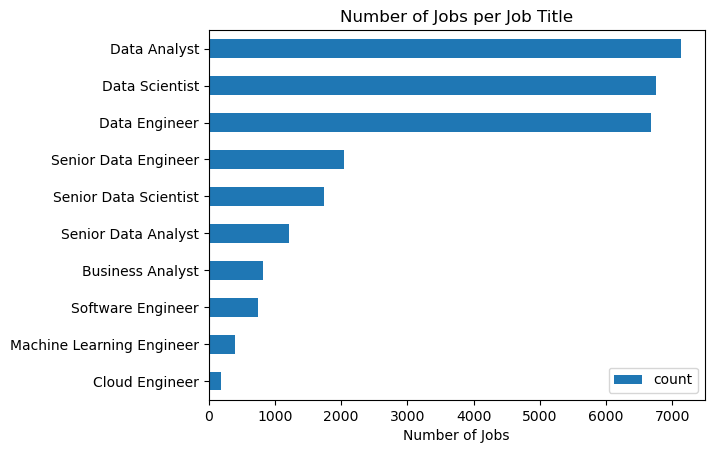

In [10]:
df_job.sort_values('count',ascending=True).plot(kind='barh')
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [25]:
df_plot = df['job_country'].value_counts().head(20)
df_plot
#df_plot.sort_values('count',ascending=True).plot(kind='barh')


job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Canada             16029
Mexico             15139
Poland             14793
Portugal           14508
Australia          12955
South Africa       12414
Belgium            12078
Philippines        11786
Ireland            11162
Switzerland         9924
Name: count, dtype: int64

In [44]:
df_plot = df['job_country'].value_counts().head(20).to_frame()
df_plot
#df_plot.sort_values('count',ascending=True).plot(kind='barh')


,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


Text(0.5, 0, 'Number of Jobs')

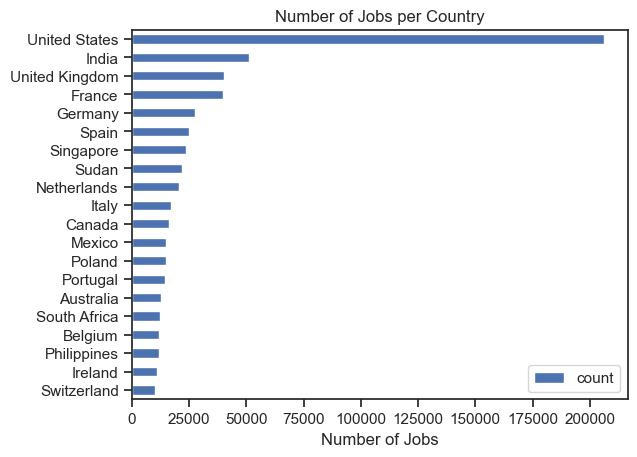

In [46]:
df_plot = df['job_country'].value_counts().head(20).to_frame()
df_plot.sort_values('count',ascending=True).plot(kind='barh')
plt.title('Number of Jobs per Country')
plt.ylabel('')
plt.xlabel('Number of Jobs')

### Number of Jobs per Company in Germany

Text(0.5, 0, 'Number of Jobs')

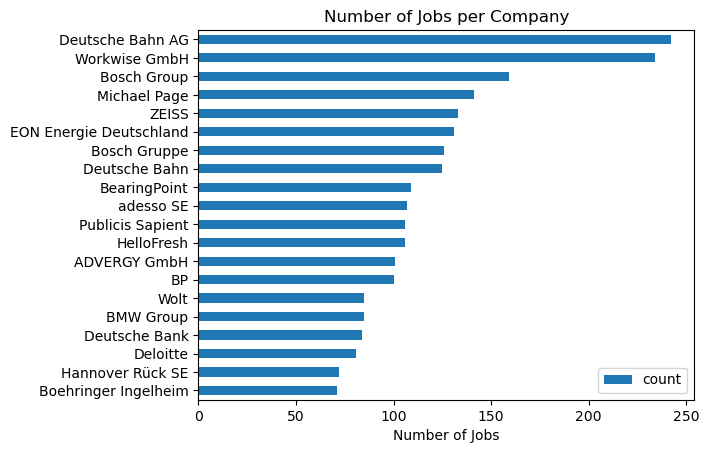

In [3]:
df_germ = df[df['job_country'] == 'Germany']

df_plot = df_germ['company_name'].value_counts().head(20).to_frame()
df_plot.sort_values('count',ascending=True).plot(kind='barh')
plt.title('Number of Jobs per Company')
plt.ylabel('')
plt.xlabel('Number of Jobs')

### Work from Home Opportunites in Germany and Degree Requirement

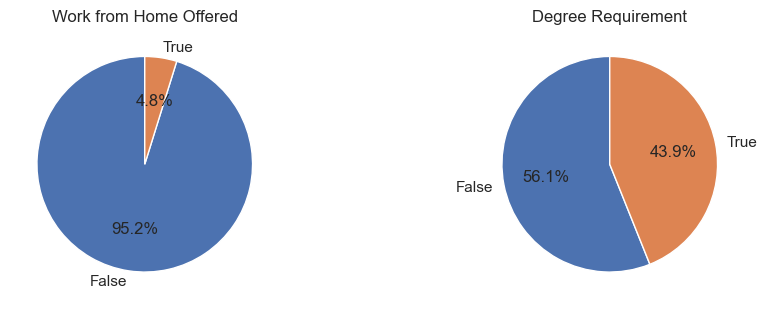

In [54]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1, 2, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_germ[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### Exploratory Data Analysis for Data Scientists in Germany

In [55]:
df_germ_ds = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Scientist')]
df_germ_ds

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
199,Data Scientist,Data Scientist (f/m/d) | Recommendation,Anywhere,via LinkedIn,Full-time,True,Germany,2023-04-06 13:16:43,False,False,Germany,NaN,NaN,NaN,eduki,"[go, sql, python, windows]","{'os': ['windows'], 'programming': ['go', 'sql..."
260,Data Scientist,Data Scientist Technology Risk (w/m/d),"Munich, Germany",via WJHL Jobs,Full-time,False,Germany,2023-03-23 13:18:48,False,False,Germany,NaN,NaN,NaN,Ernst & Young GmbH,"[excel, powerpoint, outlook, word]","{'analyst_tools': ['excel', 'powerpoint', 'out..."
262,Data Scientist,Data Scientist (m/w/d),"Frankfurt, Germany",via Stepstone,Full-time,False,Germany,2023-08-02 13:45:41,False,False,Germany,NaN,NaN,NaN,Deutsche Bundesbank,"[python, r, java, sql, azure, aws]","{'cloud': ['azure', 'aws'], 'programming': ['p..."
367,Data Scientist,ML & Data Science - Working Student - B2B Solu...,Anywhere,via LinkedIn,Part-time,True,Germany,2023-06-26 13:11:35,False,False,Germany,NaN,NaN,NaN,JustWatch,"[python, snowflake, pytorch]","{'cloud': ['snowflake'], 'libraries': ['pytorc..."
439,Data Scientist,Data Scientist,"Stuttgart, Germany",via WGN-TV Jobs,Full-time,False,Germany,2023-02-02 13:19:43,False,False,Germany,NaN,NaN,NaN,DeepScenario GmbH,[python],{'programming': ['python']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785292,Data Scientist,Developer / Data Scientist (m/f/d),"Stuttgart, Germany",via Monster.de,Full-time,False,Germany,2023-01-12 06:23:45,False,False,Germany,NaN,NaN,NaN,Allianz Investment Management SE,"[python, java, c#, c++, sql, spark, docker]","{'libraries': ['spark'], 'other': ['docker'], ..."
785332,Data Scientist,Consultant Data Science & berufsbegleitender M...,"Munich, Germany",via Monster.de,Part-time,False,Germany,2023-01-15 06:20:06,False,False,Germany,NaN,NaN,NaN,Workwise GmbH,"[python, java, snowflake, azure]","{'cloud': ['snowflake', 'azure'], 'programming..."
785500,Data Scientist,Data Scientist (m/w/d),"Hamburg, Germany",via Monster.de,Full-time,False,Germany,2023-01-11 06:39:22,False,False,Germany,NaN,NaN,NaN,Michael Page,NaN,NaN
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


### Count of Job Locations for Data Scientists in Germany

In [69]:
df_p = df_germ_ds['job_location'].value_counts().head(30).to_frame()
df_p

,count
job_location,
"Berlin, Germany",850
"Munich, Germany",607
Germany,575
"Hamburg, Germany",386
"Frankfurt, Germany",314
Anywhere,286
"Stuttgart, Germany",205
"Cologne, Germany",199
"Düsseldorf, Germany",166


Text(0.5, 0, 'Number of Jobs')

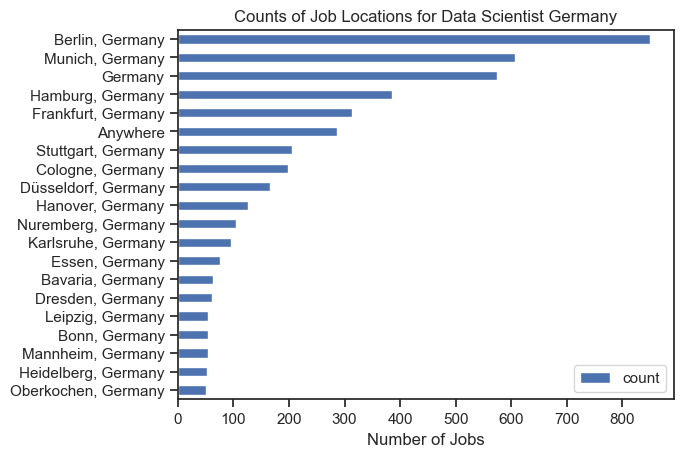

In [66]:
df_p = df_germ_ds['job_location'].value_counts().head(20).to_frame()
df_p.sort_values('count',ascending=True).plot(kind='barh')
plt.title('Counts of Job Locations for Data Scientist Germany')
plt.ylabel('')
plt.xlabel('Number of Jobs')